<a href="https://colab.research.google.com/github/tsubasa-km/splatoon3_result_extraction/blob/main/splatoon3_weapons_icon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 画像から武器アイコンを取得する。

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# 入力フォルダと出力フォルダのパス
input_folder = "/content/drive/MyDrive/スプラ3リザルト"  # 画像が入ったフォルダ
output_folder = "/content/drive/MyDrive/スプラ3武器アイコン"  # アイコンを保存するフォルダ

# 出力フォルダが存在しない場合は作成
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# フォルダ内の画像ファイルを取得
image_files = [f for f in os.listdir(input_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]


def get_icons_from_image(image_path):
    # 画像を読み込み
    image = cv2.imread(image_path)

    # 画像の高さと幅を取得
    height, width, _ = image.shape

    # トリミング範囲: 高さを中央に、幅を1/6に設定
    optimized_region = image[int(height * 0.2):int(height * 0.8), 0:int(width / 6)]

    # グレースケール変換
    gray_optimized = cv2.cvtColor(optimized_region, cv2.COLOR_BGR2GRAY)

    # 円形検出
    circles_optimized = cv2.HoughCircles(
        gray_optimized, cv2.HOUGH_GRADIENT, dp=1.1, minDist=30, param1=50, param2=28, minRadius=25, maxRadius=50
    )

    # 検出されたアイコンを上から順に並べる
    if circles_optimized is not None:
        # ソート: y座標を基準に昇順
        circles_optimized = np.round(circles_optimized[0, :]).astype("int")
        sorted_circles = sorted(circles_optimized, key=lambda c: c[1])

        # ソートされた順序でアイコンを切り出し
        sorted_cropped_icons = []
        for (x, y, r) in sorted_circles:
            cropped_icon = optimized_region[max(0, y - r):y + r, max(0, x - r):x + r]
            sorted_cropped_icons.append(cropped_icon)

        # 上から順に8個に限定
        final_sorted_icons = sorted_cropped_icons[:8]

        # 切り抜いたアイコンを保存
        base_name = os.path.splitext(image_file)[0]
        for i, icon in enumerate(final_sorted_icons):
            output_path = os.path.join(output_folder, f"{base_name}_icon_{i+1}.png")
            cv2.imwrite(output_path, icon)

    else:
        print(f"円形アイコンが検出されませんでした: {image_file}")


# 各画像に対して処理を実施
for image_file in image_files:
    # 画像を読み込み
    image_path = os.path.join(input_folder, image_file)
    get_icons_from_image(image_path)


print("すべての処理が完了しました。")


すべての処理が完了しました。


## 武器をグループ分けする

In [ ]:
import os
import shutil

# 入力フォルダと整理済みフォルダのパス
input_folder = "/content/drive/MyDrive/スプラ3武器アイコン"
output_folder = "/content/drive/MyDrive/スプラ3武器アイコン/整理済み"

# 画像リスト（入力フォルダの画像を取得）
image_paths = [os.path.join(input_folder, f) for f in os.listdir(input_folder) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

# 整理済みフォルダ内のラベルと画像を取得
sorted_images = {}
for label in sorted(os.listdir(output_folder)):
    label_path = os.path.join(output_folder, label)
    if os.path.isdir(label_path):
        sorted_images[label] = [os.path.join(label_path, img) for img in os.listdir(label_path) if img.lower().endswith(('png', 'jpg', 'jpeg'))]

# 新しい画像を分類
for image_path in image_paths:
    print(f"Processing image: {image_path}")

    # ユーザー入力のラベル
    label = input("Enter label for the image: ")
    label = label.replace("/", "")  # スラッシュを削除

    # ラベルフォルダのパス
    label_folder = os.path.join(output_folder, label)
    os.makedirs(label_folder, exist_ok=True)

    # ラベルに属する画像がすでに存在する場合
    if label in sorted_images:
        # 画像が2枚未満なら追加
        if len(sorted_images[label]) < 2:
            shutil.move(image_path, os.path.join(label_folder, os.path.basename(image_path)))
            sorted_images[label].append(os.path.join(label_folder, os.path.basename(image_path)))
            print(f"Image added to label '{label}'.")
        else:
            print(f"Label '{label}' already has 2 images. Skipping this image.")
    else:
        # 新しいラベルの場合
        shutil.move(image_path, os.path.join(label_folder, os.path.basename(image_path)))
        sorted_images[label] = [os.path.join(label_folder, os.path.basename(image_path))]
        print(f"Label '{label}' created and image added.")

print("Image classification complete.")


All images have been successfully sorted.


## 画像の表示

Total number of labels (groups): 74
Total number of images: 120
Label '52ガロン': 2 images
Label '52ガロンデコ': 2 images
Label '96ガロンデコ': 1 images
Label 'H3リールガンD': 1 images
Label 'N-ZAP85': 2 images
Label 'N-ZAP89': 1 images
Label 'R-PEN5H': 2 images
Label 'Rブラスターエリートデコ': 2 images
Label 'S-BLAST91': 2 images
Label 'S-BLAST92': 2 images
Label 'もみじシューター': 2 images
Label 'わかばシューター': 2 images
Label 'イグザミナー': 2 images
Label 'イグザミナー・ヒュー': 1 images
Label 'ヴァリアブルローラー': 1 images
Label 'ヴァリアブルローラーフォイル': 1 images
Label 'オーダーシューターレプリカ': 2 images
Label 'オーダーブラシレプリカ': 1 images
Label 'オーバーフロッシャー': 2 images
Label 'カーボンローラーデコ': 2 images
Label 'クアッドホッパーブラック': 2 images
Label 'クアッドホッパーホワイト': 2 images
Label 'クラッシュブラスター': 2 images
Label 'クーゲルシュライバー': 2 images
Label 'ケルビン525': 1 images
Label 'ケルビン525デコ': 2 images
Label 'ジェットスイーパー': 2 images
Label 'ジムワイパー': 2 images
Label 'シャープマーカー': 2 images
Label 'シャープマーカーネオ': 1 images
Label 'スクリュースロッシャー': 2 images
Label 'スクリュースロッシャーネオ':

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12459 (\N{KATAKANA LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12441 (\N{COMBINING KATAKANA-HIRAGANA VOICED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12525 (\N{KATAKANA LETTER RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/pyth

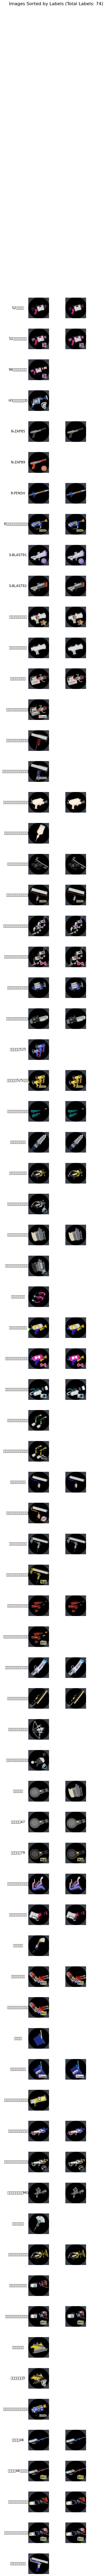

In [ ]:
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.image import imread

# 日本語フォントを設定
rcParams['font.family'] = 'Noto Sans CJK JP'

# 整理済みフォルダのパス
output_folder = "/content/drive/MyDrive/スプラ3武器アイコン/整理済み"

# フォルダ内のラベルと画像を収集
labels = []
images_by_label = []

for label in sorted(os.listdir(output_folder)):
    label_path = os.path.join(output_folder, label)
    if os.path.isdir(label_path):
        labels.append(label)
        images = [os.path.join(label_path, img) for img in os.listdir(label_path) if img.lower().endswith(('png', 'jpg', 'jpeg'))]
        images_by_label.append(images)

# ラベル数表示
num_labels = len(labels)
total_images = sum(len(images) for images in images_by_label)
print(f"Total number of labels (groups): {num_labels}")
print(f"Total number of images: {total_images}")
for label, images in zip(labels, images_by_label):
    print(f"Label '{label}': {len(images)} images")

# プロット
max_images = max(len(images) for images in images_by_label)
fig, axes = plt.subplots(num_labels, max_images, figsize=(max_images * 2, num_labels * 2))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for row, (label, images) in enumerate(zip(labels, images_by_label)):
    for col in range(max_images):
        ax = axes[row, col] if num_labels > 1 else axes[col]
        ax.axis('off')
        if col < len(images):
            img = imread(images[col])
            ax.imshow(img)
        if col == 0:
            ax.text(-0.5, 0.5, label, fontsize=12, ha='center', va='center', rotation=0, transform=ax.transAxes)

plt.suptitle(f"Images Sorted by Labels (Total Labels: {num_labels})", fontsize=16)
plt.show()
